#  **Introduction**
 Bellabeat is a high-tech company that manufactures health-focused smart products. The company developed beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.

Company websit: [Bellabeat](http://https://bellabeat.com/)

# **Business Task**
Bellabeat would like to analyze smart device usage data in order to gain insight into how people are already using their smart devices.

# **Stakeholders**
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer 
2. Sando Mur: Mathematician and Bellabeat’s cofounder 
3. Bellabeat marketing analytics team 

# **Questions to answer**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# **Dataset**
Date : [FitBit Fitness Tracker Data](http://https://www.kaggle.com/arashnic/fitbit)

Source : Kaggle

Content: These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016

Limitations: The lack of information of participants' background like the age, occupation and location limits the analysis.

Data used are DailyActivity, SleepDay, weight, hourlySteps, hourlyIntensity, hourlyCalories

# **Data Preparation**

Loading Packages: pandas, numpy, seaborn, matplotlib. pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Daily Data

df = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
df1 = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
df2 = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

#hourly Data
df3 = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
df4 = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
df5 = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

**Data cleaning and manipulation** on dailyActivity (df)

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

* TotalDistance and TrackerDistance have the same values so I want drop one of them.
* 'LoggedActivitiesDistance' will be dropped.
* Data type of 'ActivityDate' column is object so I need to change it to Datetime.
* To prepare for the merging of dataframes, I would unify the name of columns


In [5]:
df.rename(str.lower, axis=1, inplace=True)
df.rename(columns={"activitydate": "date"},inplace=True)
df.drop(['trackerdistance','loggedactivitiesdistance'],axis=1,inplace=True)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.duplicated(subset=['id','date']).sum() # there is no duplicates in df

0

In [8]:
# Tp prepate a new colunm for day of week
df['day of week'] = df['date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week'] = df['day of week'].map(dmap)

In [9]:
df.head()

,id,date,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,day of week
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tue
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wed
2,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thu
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,Fri
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,Sat


**Date cleaning and manipulation** on df1

In [10]:
df1.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


* Change Data type of 'SleepDay' and name of 'SleepDay' will be changed to 'date'.

In [12]:
df1.rename(str.lower, axis=1, inplace=True)
df1.rename(columns={"sleepday": "date"},inplace=True)
df1['date'] = pd.to_datetime(df1['date'])

In [13]:
df1.head()

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [14]:
df1.duplicated(subset=['id', 'date']).sum() # there are 3 duplicates

3

In [15]:
df1.loc[df1.duplicated(subset=['id', 'date'],keep=False),:] # look at the all duplicates

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
160,4388161847,2016-05-05,1,471,495
161,4388161847,2016-05-05,1,471,495
222,4702921684,2016-05-07,1,520,543
223,4702921684,2016-05-07,1,520,543
379,8378563200,2016-04-25,1,388,402
380,8378563200,2016-04-25,1,388,402


In [16]:
df1.drop_duplicates(subset=['id', 'date'],keep='first',inplace=True) # drop duplicates and keep the first

In [17]:
df1.info()# 3 duplicates are dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  410 non-null    int64         
 1   date                410 non-null    datetime64[ns]
 2   totalsleeprecords   410 non-null    int64         
 3   totalminutesasleep  410 non-null    int64         
 4   totaltimeinbed      410 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.2 KB


**Date cleaning** on df2

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [19]:
df2.rename(str.lower, axis=1, inplace=True)
df2['date'] = pd.to_datetime(df1['date'])

In [20]:
df2.head()

,id,date,weightkg,weightpounds,fat,bmi,ismanualreport,logid
0,1503960366,2016-04-12,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-04-13,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-15,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-16,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-04-17,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [23]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [24]:
df_hourly = pd.merge(pd.merge(df3,df4,on=['Id','ActivityHour']),df5,on=['Id','ActivityHour'])
# Three dataframes are merged together and then cleaned up

In [25]:
df_hourly.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


In [26]:
df_hourly.rename(str.lower, axis=1, inplace=True)
df_hourly.rename(columns={"activityhour": "datetime"},inplace=True)
df_hourly['datetime'] = pd.to_datetime(df_hourly['datetime'])

In [27]:
df_hourly["date"] = [d.date() for d in df_hourly['datetime']]

In [28]:
df_hourly['time'] = df_hourly['datetime'].dt.time

In [29]:
df_hourly.duplicated(subset=['id', 'datetime']).sum() # There is no duplicates

0

In [30]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                22099 non-null  int64         
 1   datetime          22099 non-null  datetime64[ns]
 2   calories          22099 non-null  int64         
 3   totalintensity    22099 non-null  int64         
 4   averageintensity  22099 non-null  float64       
 5   steptotal         22099 non-null  int64         
 6   date              22099 non-null  object        
 7   time              22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.5+ MB


# **Data Exploration**

The number of participants involved in dataframe are:

In [31]:
df['id'].nunique()

33

In [32]:
df1['id'].nunique()

24

In [33]:
df2['id'].nunique() #only 67 rows of data and 8 participants included so df2 would not be used.

8

In [34]:
df_hourly['id'].nunique()

33

In [35]:
df.loc[:, df.columns != 'id'].describe()

,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [36]:
df[df['totalsteps'] < 1000]['id'].count()

109

In [37]:
df1.loc[:, df1.columns != 'id'].describe()

,totalsleeprecords,totalminutesasleep,totaltimeinbed
count,410.000000,410.000000,410.000000
mean,1.119512,419.173171,458.482927
std,0.346636,118.635918,127.455140
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.750000
50%,1.000000,432.500000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


In [38]:
df_hourly.loc[:, df_hourly.columns != 'id'].describe()

,calories,totalintensity,averageintensity,steptotal
count,22099.000000,22099.000000,22099.000000,22099.000000
mean,97.386760,12.035341,0.200589,320.166342
std,60.702622,21.133110,0.352219,690.384228
min,42.000000,0.000000,0.000000,0.000000
25%,63.000000,0.000000,0.000000,0.000000
50%,83.000000,3.000000,0.050000,40.000000
75%,108.000000,16.000000,0.266667,357.000000
max,948.000000,180.000000,3.000000,10554.000000


**Summary of descriptive data**
* Among the total 33 participants, 24 of them provided daily sleeping record and 8 of them provided weight records. As only 67 rows of data and 8 participants included in daily weight data, it would not be used for further analysis.
* 109 out of 940 (11.5%) daily tracking records shows that the particiant walk less than 1,000 steps per day which is far lower than 10,000 steps recommended by [Centers for Disease Control and Prevention (CDC)](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#:~:text=For%20general%20fitness%2C%20most%20adults,Control%20and%20Prevention%20(CDC).)
* 25 % of daily tracking records shows that people sleep less than 6 hours which is lower than 7-9 hours recommended by [National Sleep Foundation guidelines1](https://pubmed.ncbi.nlm.nih.gov/29073412/)


**Merging daily activity data and sleep data**

In [39]:
df_daily = pd.merge(df,df1, how='right', on=['id','date'])

In [40]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        410 non-null    int64         
 1   date                      410 non-null    datetime64[ns]
 2   totalsteps                410 non-null    int64         
 3   totaldistance             410 non-null    float64       
 4   veryactivedistance        410 non-null    float64       
 5   moderatelyactivedistance  410 non-null    float64       
 6   lightactivedistance       410 non-null    float64       
 7   sedentaryactivedistance   410 non-null    float64       
 8   veryactiveminutes         410 non-null    int64         
 9   fairlyactiveminutes       410 non-null    int64         
 10  lightlyactiveminutes      410 non-null    int64         
 11  sedentaryminutes          410 non-null    int64         
 12  calories              

Three datasets used:
1. df - total activity containing all tracking daily records
2. df_daily - sleep day group and their other daily records
3. df_hourly - total activity containing all tracking hourly records

I try to analyze them and find out the trends from the data in order to help Bellabeat marketing strategy.

# **Data Visualisation**

**Starts with df - total daily records**

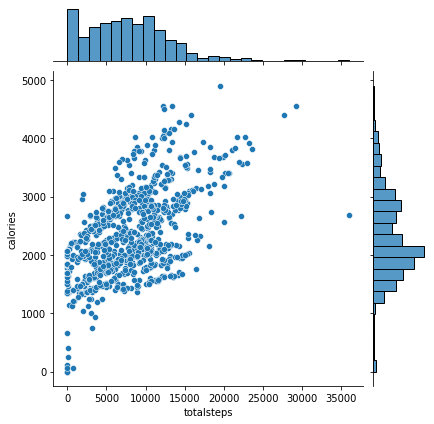

In [41]:
sns.jointplot(x='totalsteps',y='calories',data=df,kind='scatter')

* Total steps data are positively correlated to calories. As people walk more, they burn more calories.

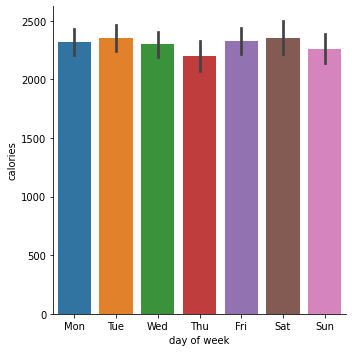

In [42]:
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.catplot(x='day of week',y='calories',data=df,kind='bar',order=order)

* Participants burn the least calories on Thursday.

**df_daily - sleep day group and their other daily records**

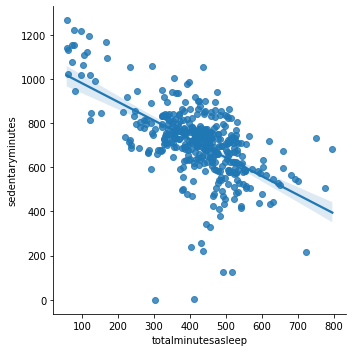

In [43]:
sns.lmplot(x='totalminutesasleep',y='sedentaryminutes',data=df_daily)

* Total minutes asleeo and sedentary minutes are inversely proportional. That mean having less time to sleep does not mean the person would have more active minutes. **It is likely that the person would be less energetic due to the lack of sleep.** But note that this correlation does not mean causation.
* It is recommended that Bellabeat customers should **set up sleep time notification to maintain a proper lifestyle.**

<AxesSubplot:xlabel='day of week', ylabel='totaltimeinbed'>

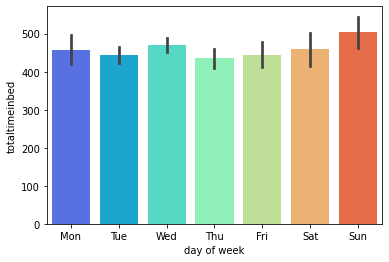

In [44]:
sns.barplot(x='day of week',y='totaltimeinbed',data=df_daily,palette='rainbow',order = order)

The total time in bed on Sunday is the highest and relatively less during weekdays. Participants may work during weekdays and they prefer sleep more on weekends.

**df_hourly - total hourly records**

Lets see anythings oberved from the hourly record

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '01:00:00'),
  Text(2, 0, '02:00:00'),
  Text(3, 0, '03:00:00'),
  Text(4, 0, '04:00:00'),
  Text(5, 0, '05:00:00'),
  Text(6, 0, '06:00:00'),
  Text(7, 0, '07:00:00'),
  Text(8, 0, '08:00:00'),
  Text(9, 0, '09:00:00'),
  Text(10, 0, '10:00:00'),
  Text(11, 0, '11:00:00'),
  Text(12, 0, '12:00:00'),
  Text(13, 0, '13:00:00'),
  Text(14, 0, '14:00:00'),
  Text(15, 0, '15:00:00'),
  Text(16, 0, '16:00:00'),
  Text(17, 0, '17:00:00'),
  Text(18, 0, '18:00:00'),
  Text(19, 0, '19:00:00'),
  Text(20, 0, '20:00:00'),
  Text(21, 0, '21:00:00'),
  Text(22, 0, '22:00:00'),
  Text(23, 0, '23:00:00')])

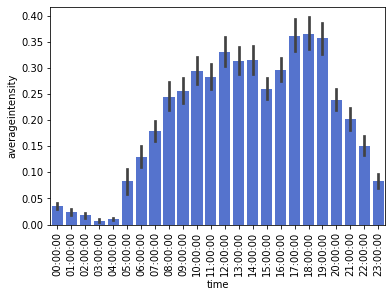

In [45]:
sns.barplot(x='time',y='averageintensity',data=df_hourly,color='royalblue')
plt.xticks(rotation=90)

* Participants are activated from 5 to 23. The peak average intensity range from 17 to 19. It is possible that participant leave from work to make this range the highest.
* It is recommended that Bellabeat customers make good use of this time to exercise more after work. **A little push to remind customers to plan for exercising during this period may be the most effective.**

# **Recommendation**

After analysing the data from FitBit Fitness Tracker Data, A few suggestions could be given to Bellabeat to make effective marketing strategy.

**Target Customers : Office ladies**

It is likely that the main customers would be those working on full-time job in Office during weekdays. Therefore they have a large amount of sedentary minutes and less sleep time in bed during weekdays. It is believed that they are aware of their health and try to improve their lifestyle therefore they buy Bellabeat products.

**Features Suggestion**
* Giving recommendation to set up bed time alert according to individual's habbit. The total time in bed should be considered at a range of 7-9 hours.
* When the sedentart time exceed certain level, notifications could be sent to remind users to start moving their bodies
* Encourage users to plan for excercise when the time is 5 - 7 pm. 5 -7 pm would be the most possible time for customers to excercise.